<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/K_Nearest_Neighbors/Digits_Dataset_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

# Dataset Preprocessing

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Split the dataset with Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X = digits['data']
y = digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1347, 64)
X_test shape: (450, 64)


# K Nearest Neighbors Classification

## Find the Best K-Value using GridSearch

In [5]:
from sklearn.model_selection import GridSearchCV
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = GridSearchCV(KNeighborsClassifier(), {
    "n_neighbors": k_values
  },
  cv = 5,
  return_train_score=False
)

clf.fit(digits['data'], digits['target'])
df = pd.DataFrame(clf.cv_results_)
df[['param_n_neighbors', 'params', 'mean_test_score', 'rank_test_score']]

,param_n_neighbors,params,mean_test_score,rank_test_score
0,1,{'n_neighbors': 1},0.964393,3
1,2,{'n_neighbors': 2},0.967171,1
2,3,{'n_neighbors': 3},0.966622,2
3,4,{'n_neighbors': 4},0.963841,4
4,5,{'n_neighbors': 5},0.962728,5
5,6,{'n_neighbors': 6},0.959386,7
6,7,{'n_neighbors': 7},0.959946,6
7,8,{'n_neighbors': 8},0.957721,8
8,9,{'n_neighbors': 9},0.956611,9
9,10,{'n_neighbors': 10},0.954943,10


In [6]:
# Best Score and Best Params
best_k_value = clf.best_params_['n_neighbors']
print("Best Params:" , best_k_value)
print("Best Score:", clf.best_score_)

Best Params: 2
Best Score: 0.9671711544413494


## For single k-value the K Nearest Classification are

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=best_k_value)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [8]:
knn_model.score(X_test, y_test)

0.9888888888888889

In [9]:
y_pred = knn_model.predict(X_test)
y_pred[:10]

array([6, 0, 4, 0, 2, 4, 4, 1, 7, 1])

# Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]])

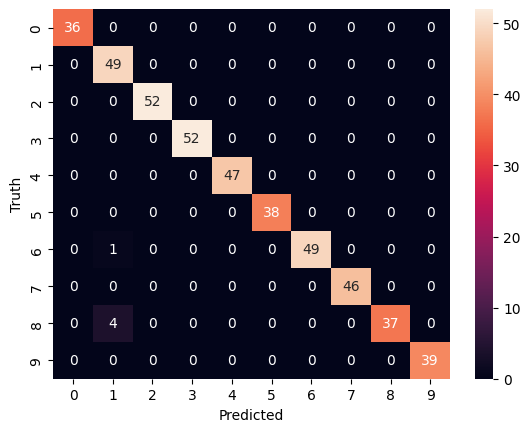

In [11]:
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      1.00      0.95        49
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        38
           6       1.00      0.98      0.99        50
           7       1.00      1.00      1.00        46
           8       1.00      0.90      0.95        41
           9       1.00      1.00      1.00        39

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

